https://nbviewer.jupyter.org/github/imagej/tutorials/blob/master/notebooks/ImageJ-Tutorials-and-Demo.ipynb

https://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html

# PFE

In [19]:
import skimage
from skimage import io
import os 
from matplotlib import pyplot as plt
import cv2

In [2]:
path = "../data/output_cpd/"

files = os.listdir(path)

In [3]:
print(files)

['A30_18W34_p1c1_07dpi.jpg', 'A30_18W34_p1c1_11dpi.jpg', 'A30_18W34_p1c1_13dpi.jpg', 'A30_18W34_p1c2_07dpi.jpg', 'A30_18W34_p1c2_11dpi.jpg', 'A30_18W34_p1c2_13dpi.jpg', 'A30_18W34_p2c1_07dpi.jpg', 'A30_18W34_p2c1_11dpi.jpg', 'A30_18W34_p2c1_13dpi.jpg', 'A30_18W34_p2c2_07dpi.jpg', 'A30_18W34_p2c2_11dpi.jpg', 'A30_18W34_p2c2_13dpi.jpg', 'A30_18W40_p1c1_07dpi.jpg', 'A30_18W40_p1c1_11dpi.jpg', 'A30_18W40_p1c1_13dpi.jpg', 'A30_18W40_p1c2_07dpi.jpg', 'A30_18W40_p1c2_11dpi.jpg', 'A30_18W40_p1c2_13dpi.jpg', 'A30_18W40_p2c1_07dpi.jpg', 'A30_18W40_p2c1_11dpi.jpg', 'A30_18W40_p2c1_13dpi.jpg', 'A30_18W40_p2c2_07dpi.jpg', 'A30_18W40_p2c2_11dpi.jpg', 'A30_18W40_p2c2_13dpi.jpg', 'A30_OzB12_p1c1_07dpi.jpg', 'A30_OzB12_p1c1_11dpi.jpg', 'A30_OzB12_p1c1_13dpi.jpg', 'A30_OzB12_p1c2_07dpi.jpg', 'A30_OzB12_p1c2_11dpi.jpg', 'A30_OzB12_p1c2_13dpi.jpg', 'A30_OzB12_p2c1_07dpi.jpg', 'A30_OzB12_p2c1_11dpi.jpg', 'A30_OzB12_p2c1_13dpi.jpg', 'A30_OzB12_p2c2_07dpi.jpg', 'A30_OzB12_p2c2_11dpi.jpg', 'A30_OzB12_p2c2_13d

(1697, 1204, 3)


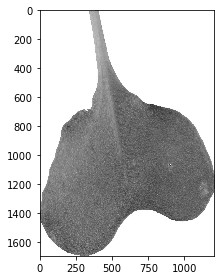

In [5]:
test = io.imread(path+files[0])
print(test.shape)
skimage.io.imshow(test[:,:,0]) # grey image

## Histogramme des couleurs

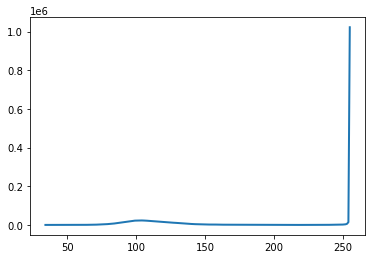

In [6]:
from skimage.exposure import histogram
hist, hist_centers = histogram(test[:,:,0])
plt.plot(hist_centers, hist, lw=2)

On observe 3 types de gris. Maintenant on doit savoir quel niveau de gris pour le vert de la feuille.

## Region based segmentation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

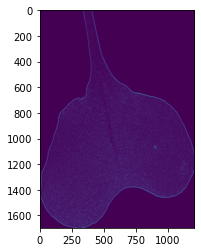

In [7]:
from skimage.filters import sobel
elevation_map = sobel(test[:,:,0])
plt.imshow(elevation_map)
elevation_map


NameError: name 'X' is not defined

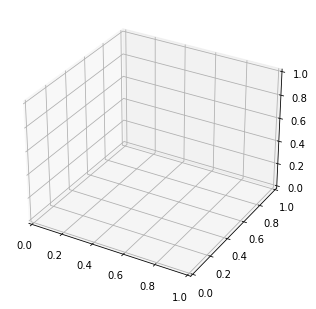

In [8]:
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet,linewidth=1, antialiased=True)
plt.show()

## Edge detection test

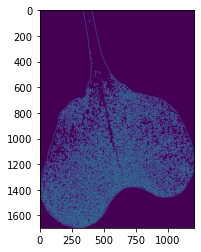

In [9]:
from skimage.feature import canny
edges = canny(test[:,:,0]/255.)
plt.imshow(edges)

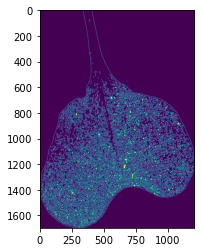

In [10]:
from scipy import ndimage as ndi
fillImage = ndi.binary_fill_holes(edges)
plt.imshow(fillImage)

# 11 janvier

## Traitement d'une image dans le temps (recalé)


In [11]:
import skimage
import os 
from matplotlib import pyplot as plt
file = "../data/output_cpd"
os.chdir(file)

photo = sorted(os.listdir())
print(photo)

['A30_18W34_p1c1_07dpi.jpg', 'A30_18W34_p1c1_11dpi.jpg', 'A30_18W34_p1c1_13dpi.jpg', 'A30_18W34_p1c2_07dpi.jpg', 'A30_18W34_p1c2_11dpi.jpg', 'A30_18W34_p1c2_13dpi.jpg', 'A30_18W34_p2c1_07dpi.jpg', 'A30_18W34_p2c1_11dpi.jpg', 'A30_18W34_p2c1_13dpi.jpg', 'A30_18W34_p2c2_07dpi.jpg', 'A30_18W34_p2c2_11dpi.jpg', 'A30_18W34_p2c2_13dpi.jpg', 'A30_18W40_p1c1_07dpi.jpg', 'A30_18W40_p1c1_11dpi.jpg', 'A30_18W40_p1c1_13dpi.jpg', 'A30_18W40_p1c2_07dpi.jpg', 'A30_18W40_p1c2_11dpi.jpg', 'A30_18W40_p1c2_13dpi.jpg', 'A30_18W40_p2c1_07dpi.jpg', 'A30_18W40_p2c1_11dpi.jpg', 'A30_18W40_p2c1_13dpi.jpg', 'A30_18W40_p2c2_07dpi.jpg', 'A30_18W40_p2c2_11dpi.jpg', 'A30_18W40_p2c2_13dpi.jpg', 'A30_OzB12_p1c1_07dpi.jpg', 'A30_OzB12_p1c1_11dpi.jpg', 'A30_OzB12_p1c1_13dpi.jpg', 'A30_OzB12_p1c2_07dpi.jpg', 'A30_OzB12_p1c2_11dpi.jpg', 'A30_OzB12_p1c2_13dpi.jpg', 'A30_OzB12_p2c1_07dpi.jpg', 'A30_OzB12_p2c1_11dpi.jpg', 'A30_OzB12_p2c1_13dpi.jpg', 'A30_OzB12_p2c2_07dpi.jpg', 'A30_OzB12_p2c2_11dpi.jpg', 'A30_OzB12_p2c2_13d

In [12]:
from skimage import io

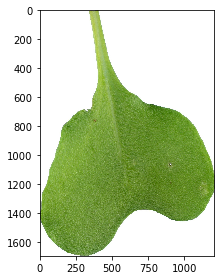

In [15]:
newImage = io.imread(photo[0])
io.imshow(newImage)

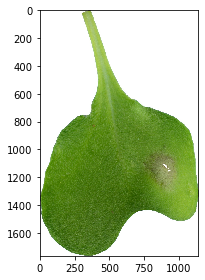

In [16]:
newImage = io.imread(photo[1])
io.imshow(newImage)

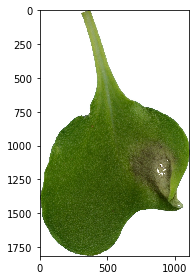

In [17]:
newImage = io.imread(photo[2])
io.imshow(newImage)

## RGB -> HSV

In [20]:
#on transforme le rgb en HSV
newImage = io.imread(photo[len(photo)-1])
img=cv2.cvtColor(newImage,cv2.COLOR_BGR2RGB)


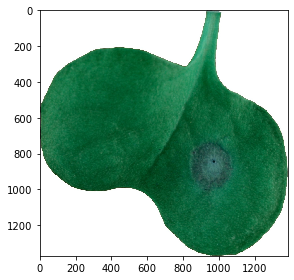

In [21]:
io.imshow(img)

In [22]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#kmeans
K = 4
attempts=50
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))


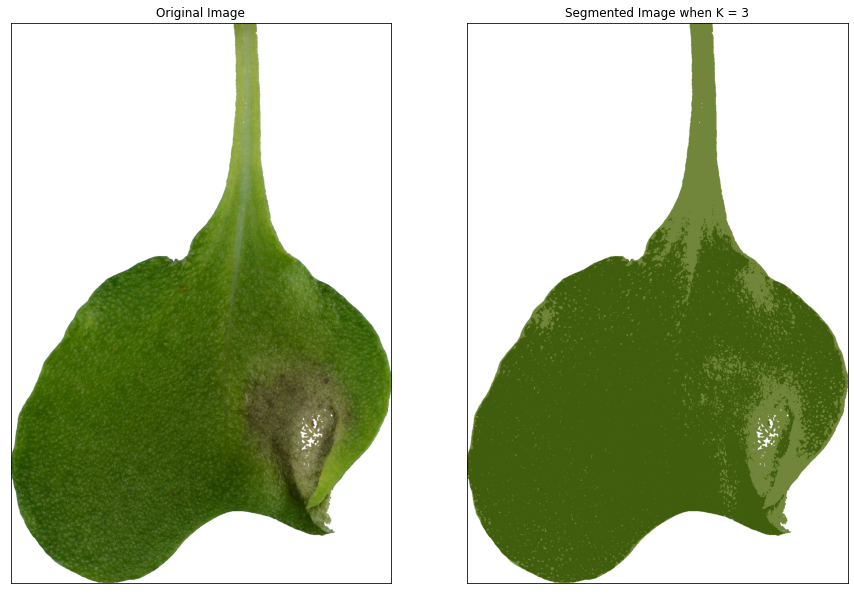

In [27]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

In [10]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#kmeans
K = 3
attempts=50
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

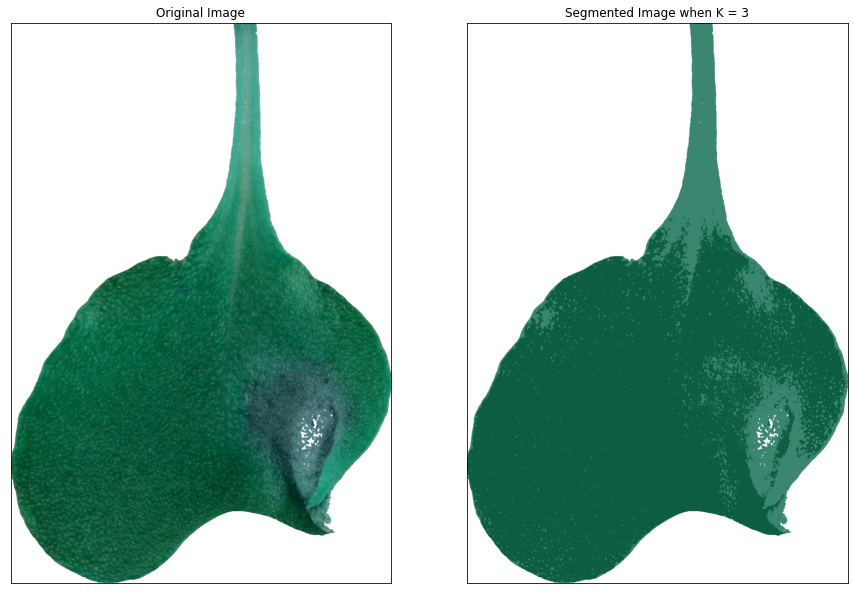

In [11]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

# Étude des histogrammes de couleurs

In [9]:
import cv2
import numpy as np
def histogramOpenCV(_img, _xlim=255, _ylim=1000):
    _, axis = plt.subplots(ncols=2, figsize=(12, 3))
    axis[0].imshow(_img)
    axis[1].set_title('Histogram')
    axis[0].set_title('Image')
    rgbcolors = ['red', 'green', 'blue']
    for i,col in enumerate(rgbcolors):
        histr = cv2.calcHist([_img],[i],None,[256],[0,256])
        axis[1].plot(histr,color = col)
        axis[1].set_xlim([0, _xlim])
        axis[1].set_ylim([0, _ylim])

In [5]:
from skimage import exposure

def histGrayScale(img, _xlim=255, _ylim=2400):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    ax = axes.ravel()
    ax[0].imshow(img, cmap=plt.get_cmap('gray'))
    ax[0].set_title('Image')
    hist = exposure.histogram(img)
    ax[1].plot(hist[0])
    # to provide a better display we just change the plot display
    ax[1].set_xlim([0, _xlim])
    ax[1].set_ylim([0, _ylim])


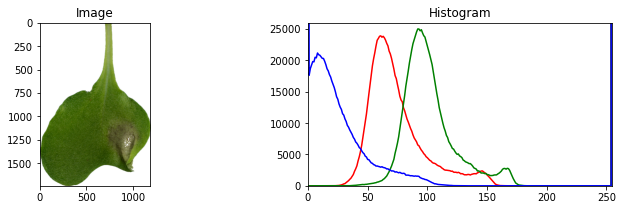

In [49]:
histogramOpenCV(img, _ylim= 26000)

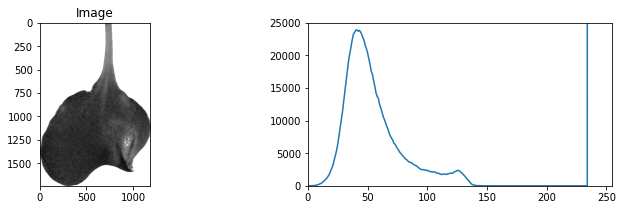

In [37]:
histGrayScale(img[:,:,0], _ylim =25000)

## OTSU

On va s'intéresser à une feuille qui a une grosse zone nécrosée.

In [6]:
from skimage.filters import threshold_mean, threshold_otsu

def scale_img(img):
    newImage = io.imread(img)
    ## (1) Convert to gray, and threshold
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    th, threshed = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

    ## (2) Morph-op to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)

    ## (3) Find the max-area contour
    cnts = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
    cnt = sorted(cnts, key=cv2.contourArea)[-1]

    ## (4) Crop and save it
    x,y,w,h = cv2.boundingRect(cnt)
    dst = newImage[y:y+h, x:x+w]
    cv2.imwrite("good_"+ img, dst)
    
def thresholdOtsuDisplay(image):
    thresh = threshold_otsu(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Otsu thresolded')

In [7]:
file = "/Users/mathisnicoli/Desktop/ENSAI/3A/PFE/test2"
os.chdir(file)

photo = sorted(os.listdir())
print(photo)

['.DS_Store', 'good_img1.jpg', 'good_img2.jpg', 'good_img3.jpg', 'img1.jpg', 'img2.jpg', 'img3.jpg']


In [53]:
for i in photo :
    if i !=".DS_Store":
        scale_img(i)

In [10]:
img3 = io.imread("good_"+photo[len(photo)-1], as_gray=True)

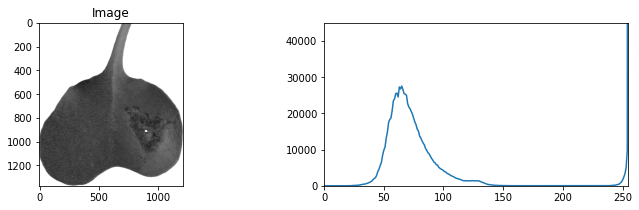

In [94]:
#img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
histGrayScale(img3, _ylim =45000)

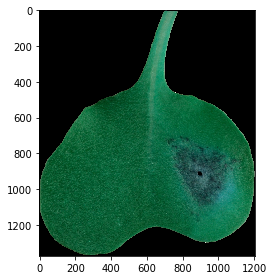

In [100]:
img3_lab = cv2.cvtColor(img3, cv2.COLOR_BGR2LAB)
img3 = io.imread("good_"+photo[len(photo)-1])

lower_white = np.array([220, 220, 220], dtype=np.uint8)
upper_white = np.array([255, 255, 255], dtype=np.uint8)
mask = cv2.inRange(img3, lower_white, upper_white)  # could also use threshold
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))  # "erase" the small white points in the resulting mask
mask = cv2.bitwise_not(mask)

# load background (could be an image too)
bk = np.full(img.shape, 255, dtype=np.uint8)  # white bk

# get masked foreground
fg_masked = cv2.bitwise_and(img3, img3, mask=mask)

io.imshow(fg_masked)

#io.imshow(img3_lab)


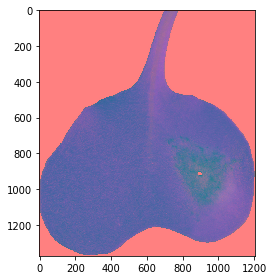

In [101]:
#img3_lab = cv2.cvtColor(fg_masked, cv2.COLOR_BGR2LAB)

io.imshow(img3_lab)

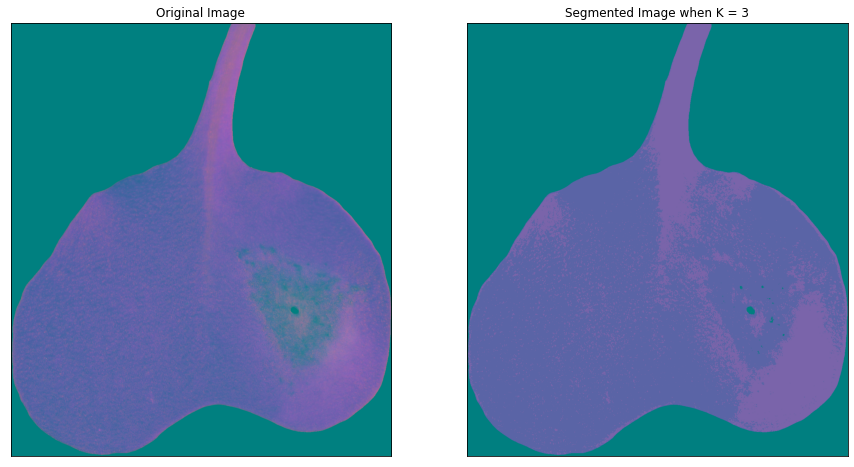

In [88]:
img = img3_lab
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#kmeans
K = 3
attempts=50
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

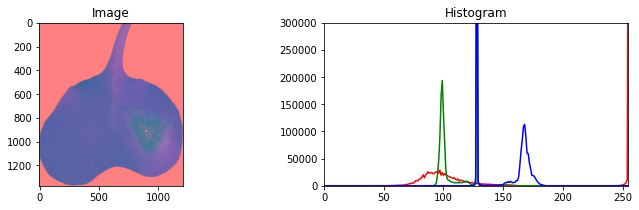

In [35]:
histogramOpenCV(img3_lab, 255, 300000)

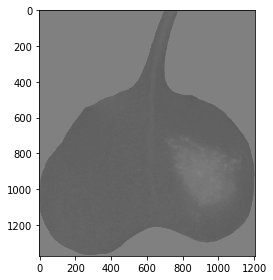

In [96]:
l,a,b = cv2.split(img3_lab)
io.imshow(a)

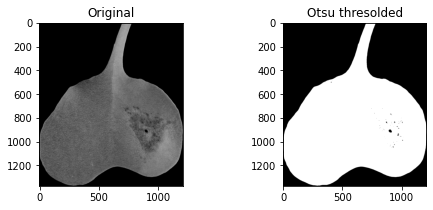

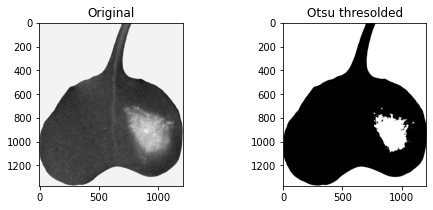

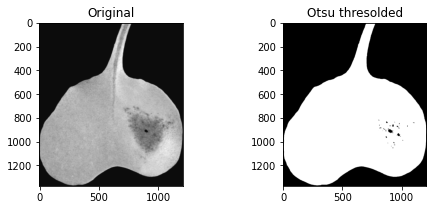

In [97]:
thresholdOtsuDisplay(l)
thresholdOtsuDisplay(a)
thresholdOtsuDisplay(b)

## k-means sur a

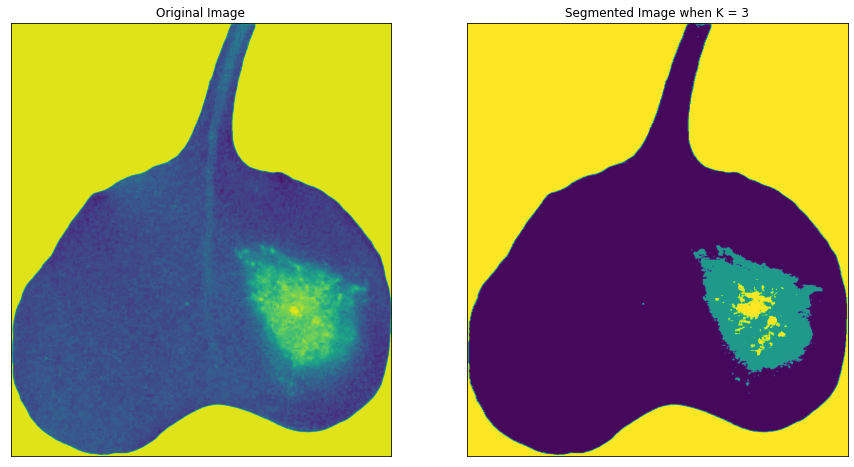

In [98]:
img = a
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#kmeans
K = 3
attempts=50
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

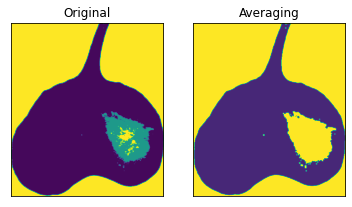

In [120]:
kernel = np.ones((8,8),np.float32)/25
dst = cv2.filter2D(result_image,-1,kernel)
plt.subplot(121),plt.imshow(result_image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [105]:
result

(1373, 1206)